# Doing business in Latin America

This notebook visualizes changes in the relative cost of doing business in Latin America from 2015-2019. The results show that although there were some countries with cost increases and others with no changes, the general trend is towards lower costs in Latin America. It includes the following statistics obtained from the World Bank API and manipulated with SQL:
- total cost cuts (start-up % + property % + contract %)
- start-up cost cuts (% of income per capita)
- property registration cost cuts (% of property value)
- contract enforcement cost cuts (% of claim)
- total percentage costs still to cut
- overall rank (lower is better)

## Prepare data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# reads in the dataframe
cuts = pd.read_csv('Cuts data\\cuts_df.csv')

# reasigns long country names
cuts.loc[cuts['COUNTRY'] == 'Dominican Republic', 'COUNTRY'] = 'D.R.'
cuts.loc[cuts['COUNTRY'] == 'St. Vincent and the Grenadines', 'COUNTRY'] = 'St. Vincent'

# creates a list of numeric column names
numeric_cols = cuts.iloc[:, 1:len(cuts.columns)-1].columns

# filters the dataframe to only those with at least some cuts in the cost of doing business (2015-2019)
improvements = cuts.loc[cuts.TOTAL_CUTS > 0,:]

# filters the dataframe to only those with increases in the cost of doing business (2015-2019)
deteriorations = cuts.loc[cuts.TOTAL_CUTS < 0,:]

# filters the dataframe to only those with no changes in the cost of doing business (2015-2019)
no_changes = cuts.loc[cuts.TOTAL_CUTS == 0,:]

## Plot function

In [2]:
# creates a subplot with 3 columns and 2 rows
def plot(data, title):
    # country colors for plotting
    color_scheme = ['#10439F' if x == 'Startup' else '#874CCC' if x == 'Property' else '#F27BBD' for x in data['LARGEST_RELATIVE_COST']]
    
    # parameters for the legend
    colors = ['#10439F', '#874CCC', '#F27BBD']  # Colors for legend
    legend_values = ['Startup', 'Property', 'Contract']  # Text labels for legend
    legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors] + [plt.Text(0, 0, label) for label in legend_values]

    # y labels
    y_labels = ['Total %', '% of income per capita', '% of property value', '% of claim', 'Total %', 'Rank']
    
    # creates a subplots object
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
    ax = ax.flatten()
    
    # loops through each plot
    for i, col in enumerate(numeric_cols):
        ax[i].bar(data['COUNTRY'], data[col], color=color_scheme, label=data['LARGEST_RELATIVE_COST']);
        ax[i].set_title(' '.join(col.lower().split('_')).title(), size=16);
        ax[i].set_ylabel(y_labels[i])
        ax[i].set_xticks(data['COUNTRY']);
        ax[i].set_xticklabels(data['COUNTRY'], rotation=45);
    
    fig.suptitle(title, size=30, y=1.025);
    plt.subplot(2, 3, 3);
    plt.legend(legend_elements, legend_values, title='Largest realtive cost', loc='best');
    plt.tight_layout();
    plt.show();

## Improvements

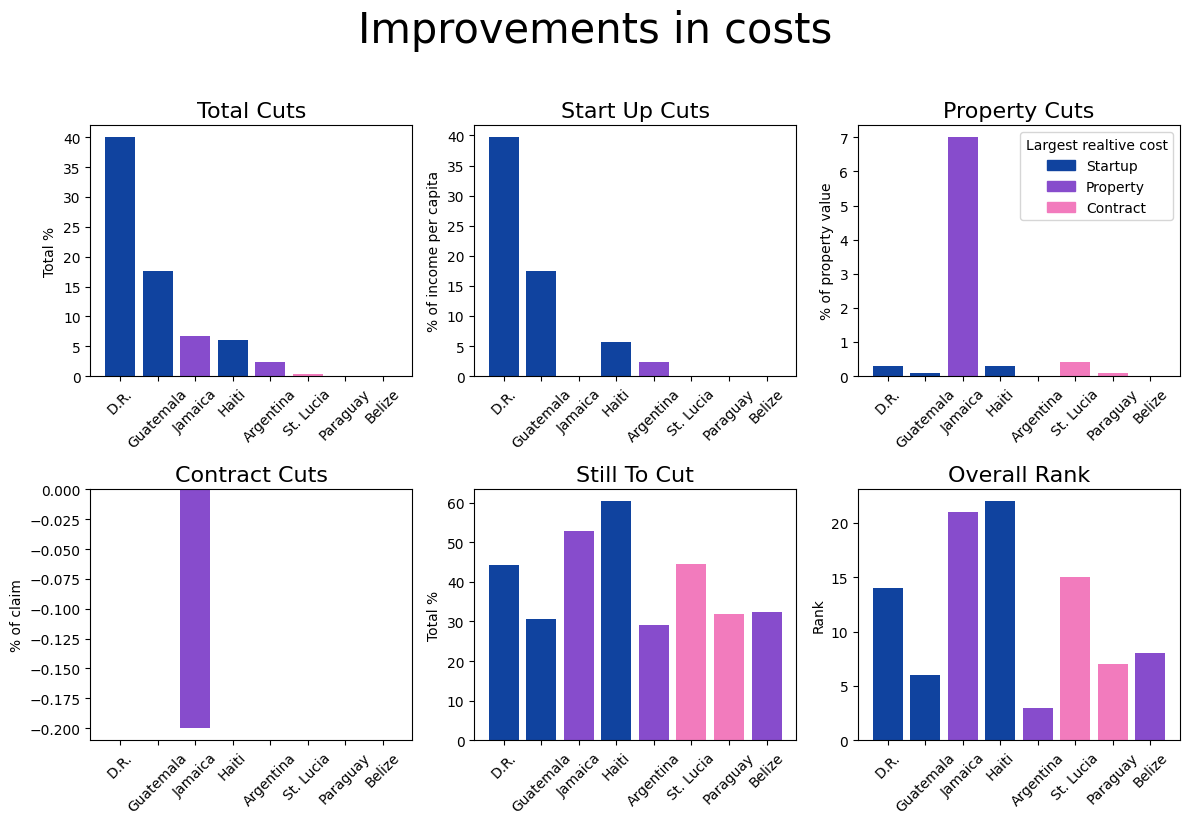

In [3]:
# plots all those with improvements in the cost of doing business
plot(improvements, 'Improvements in costs')

## Deteriorations

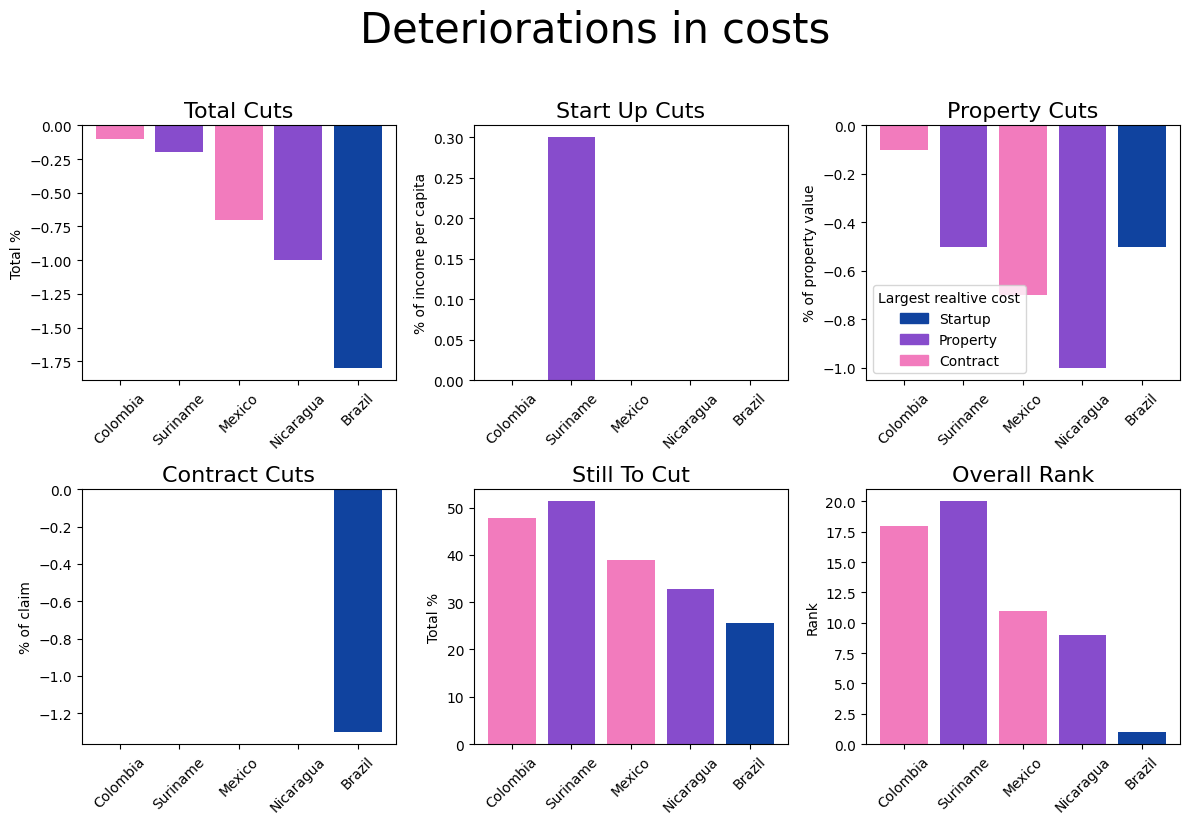

In [4]:
# plots all those with deteriorations in the cost of doing business
plot(deteriorations, 'Deteriorations in costs')

## No changes

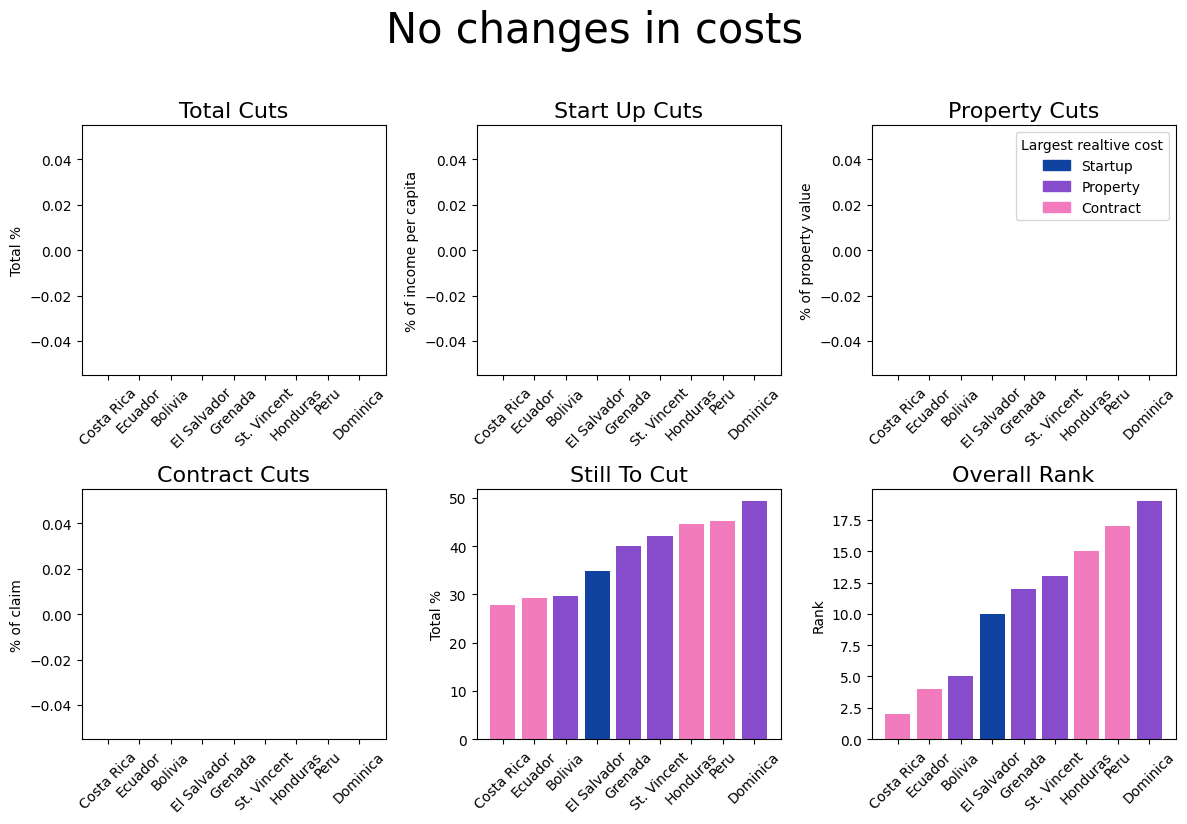

In [5]:
# plots all those with no changes in the cost of doing business
plot(no_changes, 'No changes in costs')